# **Modelo de Predicción**

Vamos a probar varios de los modelos de ensamble a ver cual funciona mejor para nuestro problema de regresión:

In [1]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve

import pickle

import sys

import warnings
warnings.filterwarnings('ignore')


sys.path.append("../")
from src import funciones_problemas_clasificacion as fpc

pd.set_option("display.max_columns", None)


In [2]:
df = pd.read_pickle("../datos/dataframes/df_nonulls_encoded_outliers.pkl")
print(df.shape)
df.head()

(4168, 26)


,Attrition,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Gender_Female,Gender_Male
0,0,0.137225,0.113943,0.166169,51,0.150770,0.151492,6,2,0.167044,1,0.145889,0.127476,131160,1.0,11,0,1.0,0.063158,1,0,0,0.153057,3,1.0,0.0
1,1,0.137225,0.164034,0.177778,31,0.245983,0.157820,10,1,0.167044,1,0.183935,0.253256,41890,0.0,23,1,6.0,0.175817,5,1,4,0.161232,4,1.0,0.0
2,0,0.150179,0.164034,0.309322,32,0.245983,0.157820,17,4,0.126582,4,0.169456,0.127476,193280,1.0,15,3,5.0,0.171053,5,0,3,0.153057,3,0.0,1.0
3,0,0.134909,0.113943,0.143733,38,0.081818,0.157820,2,5,0.167044,3,0.136364,0.127476,83210,3.0,11,3,13.0,0.147399,8,7,5,0.161232,3,0.0,1.0
4,0,0.134909,0.229044,0.143733,32,0.150770,0.157820,10,1,0.160557,1,0.169456,0.253256,23420,4.0,12,2,9.0,0.171053,6,0,4,0.153057,3,0.0,1.0


In [3]:
vr="Attrition"
modelo_clasificacion = fpc.AnalisisModelosClasificacion(df, vr)

Veamos las métricas para distintos modelos y las comparamos:

### **Logistic Regression**

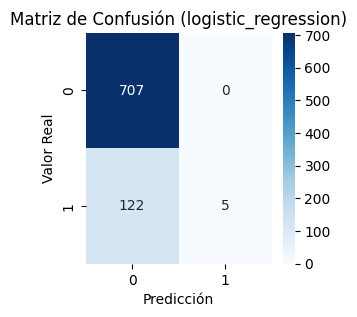

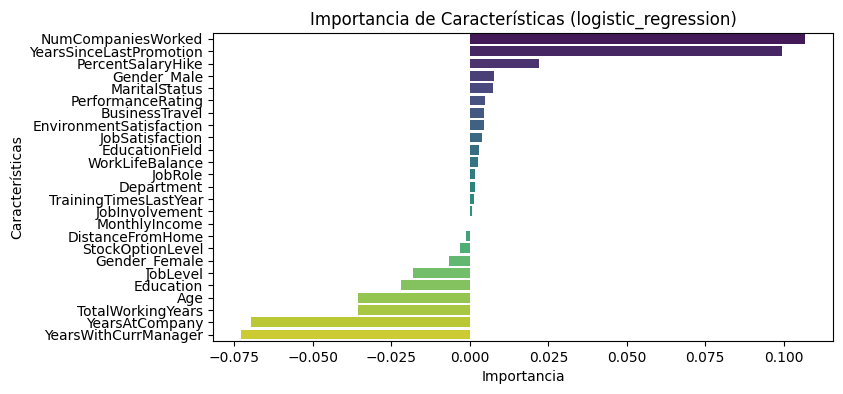

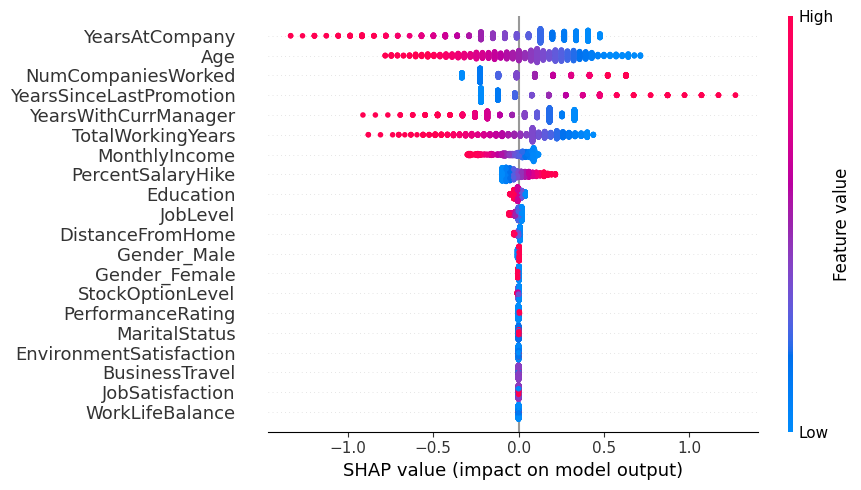

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.837133,0.863690,0.837133,0.764110,0.012166,0.701988,0.003007,NaN,NaN,NaN,regresion logistica
test,0.853717,0.875245,0.853717,0.791926,0.064971,0.727806,NaN,NaN,0.003007,NaN,regresion logistica


In [4]:
modelo_clasificacion.ajustar_modelo("logistic_regression")

modelo_clasificacion.plot_matriz_confusion("logistic_regression")
modelo_clasificacion.importancia_predictores(modelo_nombre ='logistic_regression')
modelo_clasificacion.plot_shap_summary(modelo_nombre="logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = modelo_clasificacion.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados["modelo"] = "regresion logistica"
df_resultados

### **Decision Tree**

El mejor modelo es DecisionTreeClassifier(max_depth=10)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.957409,0.958918,0.957409,0.954936,0.827770,0.971674,0.001998,16.0,NaN,NaN
test,0.943645,0.945511,0.943645,0.938734,0.746518,0.927486,NaN,NaN,0.001998,16.0


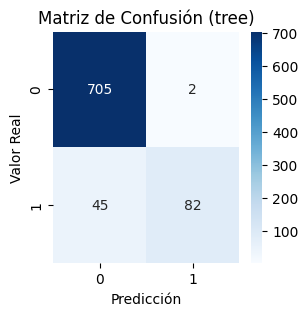

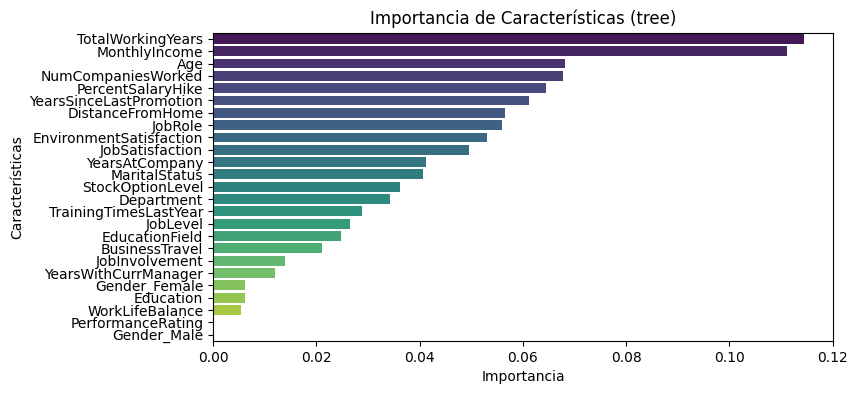

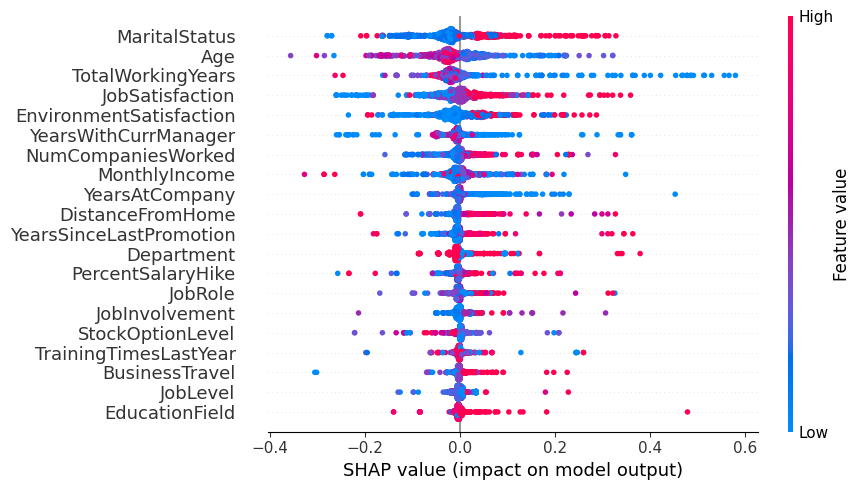

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.957409,0.958918,0.957409,0.954936,0.827770,0.971674,0.001998,16.0,NaN,NaN,decision tree
test,0.943645,0.945511,0.943645,0.938734,0.746518,0.927486,NaN,NaN,0.001998,16.0,decision tree
train,0.837133,0.863690,0.837133,0.764110,0.012166,0.701988,0.003007,NaN,NaN,NaN,regresion logistica
test,0.853717,0.875245,0.853717,0.791926,0.064971,0.727806,NaN,NaN,0.003007,NaN,regresion logistica


In [5]:
# llamamos a la función para ajustar el modelo
modelo_clasificacion.ajustar_modelo("tree")
df_resultados_tree = modelo_clasificacion.calcular_metricas(modelo_nombre =  "tree" )
display(df_resultados_tree)


modelo_clasificacion.plot_matriz_confusion("tree")
modelo_clasificacion.importancia_predictores(modelo_nombre ='tree')
modelo_clasificacion.plot_shap_summary(modelo_nombre="tree")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_tree["modelo"] = "decision tree"
df_resultados_final = pd.concat([df_resultados_tree, df_resultados], axis = 0)
df_resultados_final

# **Random Forest**

El mejor modelo es RandomForestClassifier(max_depth=20, n_jobs=-1)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,0.060961,-1.0,NaN,NaN
test,0.992806,0.992866,0.992806,0.992734,0.971584,0.9998,NaN,NaN,0.060961,-1.0


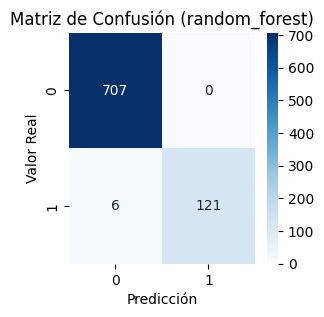

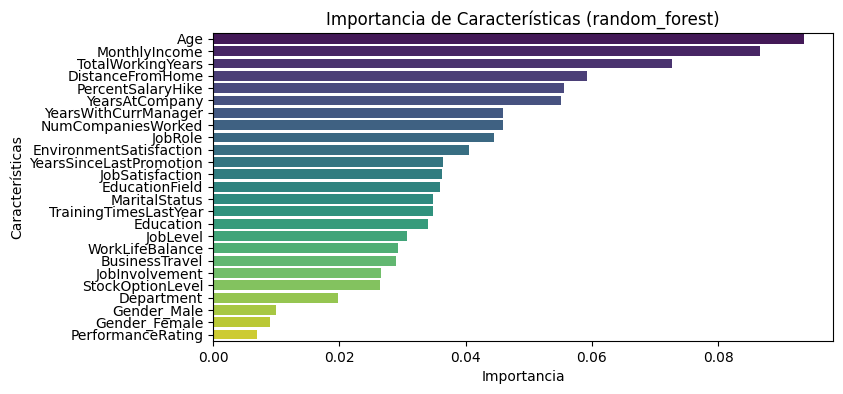

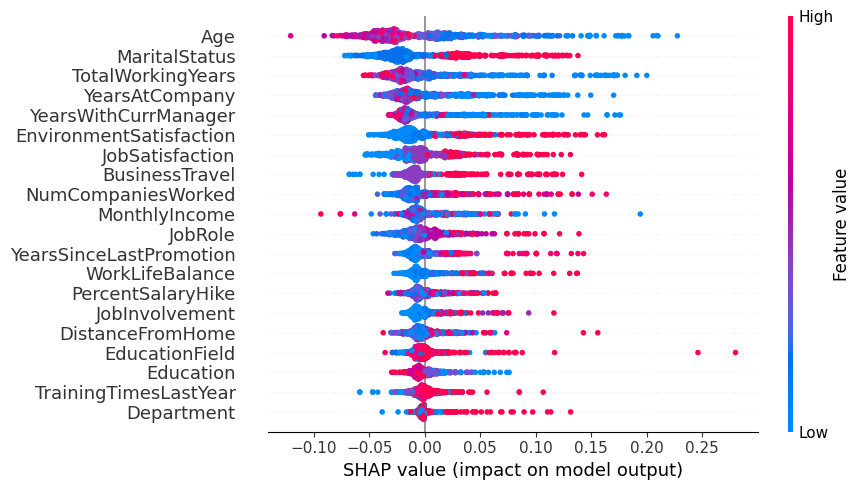

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.060961,-1.0,NaN,NaN,random forest
test,0.992806,0.992866,0.992806,0.992734,0.971584,0.999800,NaN,NaN,0.060961,-1.0,random forest
train,0.957409,0.958918,0.957409,0.954936,0.827770,0.971674,0.001998,16.0,NaN,NaN,decision tree
test,0.943645,0.945511,0.943645,0.938734,0.746518,0.927486,NaN,NaN,0.001998,16.0,decision tree
train,0.837133,0.863690,0.837133,0.764110,0.012166,0.701988,0.003007,NaN,NaN,NaN,regresion logistica
test,0.853717,0.875245,0.853717,0.791926,0.064971,0.727806,NaN,NaN,0.003007,NaN,regresion logistica


In [6]:
modelo_clasificacion.ajustar_modelo("random_forest")
df_resultados_random_forest = modelo_clasificacion.calcular_metricas(modelo_nombre = "random_forest")
display(df_resultados_random_forest)


modelo_clasificacion.plot_matriz_confusion("random_forest")
modelo_clasificacion.importancia_predictores(modelo_nombre ='random_forest')
modelo_clasificacion.plot_shap_summary(modelo_nombre="random_forest")


df_resultados_random_forest["modelo"] = "random forest"
df_resultados_final = pd.concat([df_resultados_random_forest, df_resultados_final], axis = 0)
df_resultados_final

### **Gradient Boosting**

In [7]:
modelo_clasificacion.ajustar_modelo("gradient_boosting")
df_resultados_gradient_boosting = modelo_clasificacion.calcular_metricas(modelo_nombre = "gradient_boosting")
display(df_resultados_gradient_boosting)

df_resultados_gradient_boosting["modelo"] = "gradient boosting"
df_resultados_final = pd.concat([df_resultados_gradient_boosting, df_resultados_final], axis = 0)
df_resultados_final

El mejor modelo es GradientBoostingClassifier(learning_rate=0.2, max_depth=4, n_estimators=200)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.014201,16.0,NaN,NaN
test,0.996403,0.996418,0.996403,0.996385,0.985931,0.992583,NaN,NaN,0.014201,16.0


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.014201,16.0,NaN,NaN,gradient boosting
test,0.996403,0.996418,0.996403,0.996385,0.985931,0.992583,NaN,NaN,0.014201,16.0,gradient boosting
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.060961,-1.0,NaN,NaN,random forest
test,0.992806,0.992866,0.992806,0.992734,0.971584,0.999800,NaN,NaN,0.060961,-1.0,random forest
train,0.957409,0.958918,0.957409,0.954936,0.827770,0.971674,0.001998,16.0,NaN,NaN,decision tree
test,0.943645,0.945511,0.943645,0.938734,0.746518,0.927486,NaN,NaN,0.001998,16.0,decision tree
train,0.837133,0.863690,0.837133,0.764110,0.012166,0.701988,0.003007,NaN,NaN,NaN,regresion logistica
test,0.853717,0.875245,0.853717,0.791926,0.064971,0.727806,NaN,NaN,0.003007,NaN,regresion logistica


### **XGBoost**

In [8]:
modelo_clasificacion.ajustar_modelo("xgboost")
df_resultados_xgboost = modelo_clasificacion.calcular_metricas(modelo_nombre = "xgboost")

df_resultados_xgboost["modelo"] = "xgboost"
df_resultados_final = pd.concat([df_resultados_xgboost, df_resultados_final], axis = 0)
df_resultados_final

El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.026000,NaN,NaN,NaN,xgboost
test,0.996403,0.996418,0.996403,0.996385,0.985931,0.999532,NaN,NaN,0.026000,NaN,xgboost
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.014201,16.0,NaN,NaN,gradient boosting
test,0.996403,0.996418,0.996403,0.996385,0.985931,0.992583,NaN,NaN,0.014201,16.0,gradient boosting
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.060961,-1.0,NaN,NaN,random forest
test,0.992806,0.992866,0.992806,0.992734,0.971584,0.999800,NaN,NaN,0.060961,-1.0,random forest
train,0.957409,0.958918,0.957409,0.954936,0.827770,0.971674,0.001998,16.0,NaN,NaN,decision tree
test,0.943645,0.945511,0.943645,0.938734,0.746518,0.927486,NaN,NaN,0.001998,16.0,decision tree
train,0.837133,0.863690,0.837133,0.764110,0.012166,0.701988,0.003007,NaN,NaN,NaN,regresion logistica
test,0.853717,0.875245,0.853717,0.791926,0.064971,0.727806,NaN,NaN,0.003007,NaN,regresion logistica


Una vez hemos agrupado todas las métricas en un mismo df vamos a ponerlas distintos colores para verlas mejor y analizarlas.

In [15]:
df_resultados_colores = df_resultados_final.copy()
df_resultados_colores.drop(columns=['time_seconds',
       'n_jobs', 'tiempo_computacion(segundos)', 'nucleos_usados'], inplace=True)
df_resultados_colores.reset_index(inplace = True, drop = True)
df_resultados_colores = df_resultados_colores.style.apply(fpc.color_filas_por_modelo, axis=1)

df_resultados_colores

,accuracy,precision,recall,f1,kappa,auc,modelo
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,xgboost
1,0.996403,0.996418,0.996403,0.996385,0.985931,0.999532,xgboost
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,gradient boosting
3,0.996403,0.996418,0.996403,0.996385,0.985931,0.992583,gradient boosting
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,random forest
5,0.992806,0.992866,0.992806,0.992734,0.971584,0.999800,random forest
6,0.957409,0.958918,0.957409,0.954936,0.827770,0.971674,decision tree
7,0.943645,0.945511,0.943645,0.938734,0.746518,0.927486,decision tree
8,0.837133,0.863690,0.837133,0.764110,0.012166,0.701988,regresion logistica
9,0.853717,0.875245,0.853717,0.791926,0.064971,0.727806,regresion logistica


Estas méstricas son extremadamente buenas, lo que nos hace sospechar que algo raro está pasando. Revisando el código nos damos cuenta de que al eliminar el EmployeeID aparecen más de 2800 datos duplicados, lo que representa un 65% de los datos, por eso funcionan tan bien los modelos. Habría que comprobar si estos duplicados son datos reales o han sido creado por error. Si fueran reales estos modelos funcionarían perfectamente para realizar predicciones pero asumiendo que son un error generamos la siguiente iteración si dichos duplicados que serán gestionados en el EDA.